In [1]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [2]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

 Como el paquete 'pygal' no esta incluido en Anaconda, debo instalarlo para poder utilizarlo
 En el repositorio se encuentra el archivo 'pygal-2.4.0-py2.py3-none-any.whl' necesario para la instalación 

In [3]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


# Adquisición de los datos

In [4]:
# Cargo los archivos de los partidos mediante la instrucción '.read_csv' de Pandas
# Almaceno cada uno de los archivos en una variable

df1 = pd.read_excel ('09_07_2021_Barcelona_players.xlsx')
df2 = pd.read_excel ('09_07_2021_Deportivo de La Coruna_players.xlsx')
df3 = pd.read_excel ('09_07_2021_Levante_players.xlsx')
df4 = pd.read_excel ('09_07_2021_Real Betis_players.xlsx')
df5 = pd.read_excel ('09_07_2021_Real Madrid Femenino_players.xlsx')
df6 = pd.read_excel ('09_07_2021_Real Sociedad Womens_players.xlsx')
df7 = pd.read_excel ('09_07_2021_Valencia_players.xlsx')
df8 = pd.read_excel ('09_07_2021_Atletico Madrid_players.xlsx')
df9 = pd.read_excel ('09_07_2021_Eibar_players.xlsx')
df10 = pd.read_excel ('09_07_2021_Espanyol_players.xlsx')
df11 = pd.read_excel ('09_07_2021_Granadilla Tenerife_players.xlsx')
df12 = pd.read_excel ('09_07_2021_Logrono_players.xlsx')
df13 = pd.read_excel ('09_07_2021_Madrid CFF_players.xlsx')
df14 = pd.read_excel ('09_07_2021_Rayo Vallecano_players.xlsx')
df15 = pd.read_excel ('09_07_2021_Santa Teresa_players.xlsx')
df16 = pd.read_excel ('09_07_2021_Sevilla_players.xlsx')
df17 = pd.read_excel ('09_07_2021_Sporting de Huelva_players.xlsx')
df18 = pd.read_excel ('09_07_2021_Athletic_players.xlsx')




In [5]:
df5.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,23,Claudia,189,19,CD,-,-,1,-,-,...,Spain,Real Madrid Fem,-,23,165,54,Both,-,-,1150
1,5,Thaisa,193,23,DM,1,-,1,1,100%,...,Brazil,-,-,32,166,58,Both,03.20,-,987
2,9,Kosovare Asllani,205,30,CM,17,1,47,17,36%,...,Sweden,Real Madrid Fem,Sweden,31,166,58,Right,06.21,-,2275
3,10,Sofia Jacobsson,196,33,LM,7,8,32,9,28%,...,Sweden,-,Sweden,31,174,61,Right,06.21,07.10,2705
4,15,Ivana Andres,211,31,CD,-,1,11,-,-,...,Spain,Real Madrid Fem,Spain,26,164,60,Right,06.21,04.13,2886


# Concatenacion archivos

In [6]:
df = pd.concat ([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18], sort = False)
df.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,20,Asisat Oshoala,229,40,F,25,-,111,27,24%,...,Nigeria,Barcelona,Nigeria,26,169,-,Right,06.21,08.14,2290
1,8,Marta Torrejon,269,48,RD,13,11,30,13,43%,...,Spain,Barcelona,-,31,171,62,Right,06.19,-,3620
2,18,A. Crnogorcevic,235,36,RD,4,6,20,4,20%,...,Switzerland,Barcelona,Switzerland. Frauen,30,175,65,Right,04.21,07.10,1653
3,34,Maria Perez,217,1,DM,-,-,-,-,-,...,Spain,-,-,19,-,-,Both,-,-,19
4,16,C. Hansen,301,36,RM,13,24,44,15,34%,...,Norway,Barcelona,Norway U20,26,174,-,Both,04.21,08.12,2521


# Cambio el nombre de las columnas.
Sustituyo nombre de columnas por otro mas apropiado del que tienen por defecto

In [7]:
df.rename (columns = {'Unnamed: 0': 'Index', 'Unnamed: 1':'Name'}, inplace = True)
df.head()

,Index,Name,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,20,Asisat Oshoala,229,40,F,25,-,111,27,24%,...,Nigeria,Barcelona,Nigeria,26,169,-,Right,06.21,08.14,2290
1,8,Marta Torrejon,269,48,RD,13,11,30,13,43%,...,Spain,Barcelona,-,31,171,62,Right,06.19,-,3620
2,18,A. Crnogorcevic,235,36,RD,4,6,20,4,20%,...,Switzerland,Barcelona,Switzerland. Frauen,30,175,65,Right,04.21,07.10,1653
3,34,Maria Perez,217,1,DM,-,-,-,-,-,...,Spain,-,-,19,-,-,Both,-,-,19
4,16,C. Hansen,301,36,RM,13,24,44,15,34%,...,Norway,Barcelona,Norway U20,26,174,-,Both,04.21,08.12,2521


# Eliminacion filas duplicadas

Es posible que se produzcan duplicados al concatenar archivos. Utilizo La columna 'NAME' para identificar duplicados y eliminar las filas repetidas

In [8]:
df.drop_duplicates ('Name', inplace = True)

# Transformacion columna 'Name' en indice

Sera mucho mas comodo que el indice de cada fila sea el nombre de la jugadora

In [9]:
# Transformo la columna 'Name' en el 'indice'

df.set_index ('Name', inplace = True)
df.head()

,Index,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",Сhances created,...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
Name,,,,,,,,,,,,,,,,,,,,,
Asisat Oshoala,20,229,40,F,25,-,111,27,24%,31,...,Nigeria,Barcelona,Nigeria,26,169,-,Right,06.21,08.14,2290
Marta Torrejon,8,269,48,RD,13,11,30,13,43%,44,...,Spain,Barcelona,-,31,171,62,Right,06.19,-,3620
A. Crnogorcevic,18,235,36,RD,4,6,20,4,20%,20,...,Switzerland,Barcelona,Switzerland. Frauen,30,175,65,Right,04.21,07.10,1653
Maria Perez,34,217,1,DM,-,-,-,-,-,-,...,Spain,-,-,19,-,-,Both,-,-,19
C. Hansen,16,301,36,RM,13,24,44,15,34%,93,...,Norway,Barcelona,Norway U20,26,174,-,Both,04.21,08.12,2521


# Reemplazo '-' por ceros


In [10]:
# Reemplazo '-' por ceros

df = df.replace ('-',0)
df

,Index,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",Сhances created,...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
Name,,,,,,,,,,,,,,,,,,,,,
Asisat Oshoala,20,229,40,F,25,0,111,27,24%,31,...,Nigeria,Barcelona,Nigeria,26.0,169.0,0.0,Right,06.21,08.14,2290.0
Marta Torrejon,8,269,48,RD,13,11,30,13,43%,44,...,Spain,Barcelona,0,31.0,171.0,62.0,Right,06.19,0,3620.0
A. Crnogorcevic,18,235,36,RD,4,6,20,4,20%,20,...,Switzerland,Barcelona,Switzerland. Frauen,30.0,175.0,65.0,Right,04.21,07.10,1653.0
Maria Perez,34,217,1,DM,0,0,0,0,0,0,...,Spain,0,0,19.0,0.0,0.0,Both,0,0,19.0
C. Hansen,16,301,36,RM,13,24,44,15,34%,93,...,Norway,Barcelona,Norway U20,26.0,174.0,0.0,Both,04.21,08.12,2521.0
Jenifer Hermoso,7,275,38,F,38,13,94,40,43%,46,...,Spain,Barcelona,Spain,31.0,174.0,59.0,Left,04.21,0,2576.0
Emma Ramirez Gorgoso,33,227,4,RD,0,0,0,0,0,0,...,Spain,0,0,19.0,167.0,63.0,Both,0,0,143.0
Berta Bou Salas,38,273,1,CD,1,1,1,1,100%,1,...,Spain,0,0,22.0,0.0,0.0,Both,0,0,92.0
Kheira Hamraoui,10,244,38,DM,3,1,9,3,33%,11,...,France,0,0,31.0,179.0,73.0,Right,04.19,0,1961.0


# Eliminar los % de determinadas columnas para transformarlos en 'int' y poder trabajar con ellos

In [11]:
def no_percents (player_name,name_column):
     
     
    a = df.loc [player_name, name_column]
    
    if type (a) == str:
        b = a [:-1]
        result = int (b)
    else:
        result = a
      
    return result

no_percents ('Alexia Putellas','Air challenges won, %')

54

## Minutos jugados

In [12]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def minutos_jugados (player_name):
    
    result = df.loc [player_name, 'Minutes played']
    return result

minutos_jugados ('Alexia Putellas')

3629.0

# Partidos jugados

In [13]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def partidos_jugados (player_name):
    
    result = df.loc [player_name, 'Matches played']
    return result

partidos_jugados ('Alexia Putellas')

47

# Partidos de 90 minutos disputados

In [14]:
# Dividimos el total de minutos jugados entre 90 para saber cuantos partidos de 90 minutos ha jugado

def partidos_90min (player_name):
    
    a = df.loc [player_name, 'Minutes played']
    result = a / 90
    return result

partidos_90min ('Alexia Putellas')

40.32222222222222

## Equipo en el que juega

In [15]:
def where_she_plays (player_name):
    result = df.loc [player_name, 'Team']
    return result
where_she_plays ('Alexia Putellas')

'Barcelona'

## Posición jugadoras


In [16]:
def posicion (player_name):
    result = df.loc [player_name, 'Position']
    
    if result == 'CD':
        return 'Central defender' 
    if result == 'RD':
        return 'Right defender'
    if result == 'LD':
        return 'Left defender'
    
    if result == 'DM':
        return 'Defensive midfielder'
    if result == 'CM':
        return 'Central midfielder'
    if result == 'LM':
        return 'Left midfielder'
    if result == 'RM':
        return 'Right midfielder'
    
    if result == 'F':
        return 'Forward'
    
    return result    

In [17]:
posicion ('Alexia Putellas')

'Central midfielder'

# Nationality

In [18]:
def nationality (player_name):
    result = df.loc [player_name, 'Nationality']
    return result
nationality ('Alexia Putellas')

'Spain'

# National team

In [19]:
def national_team (player_name):
    result = df.loc [player_name, 'National team ']
    return result
national_team ('Alexia Putellas')

'Spain'

# Foot

In [20]:
def foot (player_name):
    result = df.loc [player_name, 'Foot']
    return result
foot ('Alexia Putellas')    

'Left'

# Age

In [21]:
def age (player_name):
    result = df.loc [player_name, 'Age']
    return result
age ('Alexia Putellas')  

27.0

# Height

In [22]:
def height (player_name):
    result = df.loc [player_name, 'Height']
    return result
height ('Alexia Putellas')  

173.0

# Weight

In [23]:
def weight (player_name):
    result = df.loc [player_name, 'Weight']
    return result
weight ('Alexia Putellas')  

67.0

# Elimino las columnas de datos que no voy a normalizar

In [24]:
Liga = df.drop (['Matches played','Minutes played','Index','InStat Index','Position', 'Chances, % of conversion', 'Accurate passes, %', 'Accurate crosses, %','Challenges won, %', 'Challenges in defence won, %','Challenges in attack won, %','Successful dribbles, %','Tackles won, %','Nationality','Team','National team ','Team','Foot','National team (last match date, mm.yy)','Youth national team (last match date, mm.yy)','Air challenges won, %','Age','Height','Weight','xG (Expected goals)'], axis = 1)
Liga

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Asisat Oshoala,25,0,111,27,31,21,10,1,0.0,46.0,...,19.0,16.0,298.0,62.0,236.0,59.0,54.0,31.0,31.0,59.0
Marta Torrejon,13,11,30,13,44,34,13,3,0.0,6.0,...,281.0,129.0,435.0,275.0,160.0,105.0,45.0,94.0,236.0,288.0
A. Crnogorcevic,4,6,20,4,20,9,11,0,0.0,6.0,...,84.0,33.0,193.0,96.0,97.0,30.0,33.0,42.0,73.0,108.0
Maria Perez,0,0,0,0,0,0,0,0,0.0,0.0,...,2.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
C. Hansen,13,24,44,15,93,12,22,1,0.0,9.0,...,54.0,38.0,563.0,96.0,467.0,28.0,326.0,65.0,49.0,123.0
Jenifer Hermoso,38,13,94,40,46,28,39,0,0.0,21.0,...,77.0,57.0,385.0,121.0,264.0,72.0,98.0,68.0,56.0,130.0
Emma Ramirez Gorgoso,0,0,0,0,0,1,1,0,0.0,0.0,...,8.0,4.0,11.0,8.0,3.0,3.0,3.0,5.0,6.0,7.0
Berta Bou Salas,1,1,1,1,1,3,0,0,0.0,0.0,...,6.0,2.0,14.0,10.0,4.0,3.0,2.0,3.0,3.0,4.0
Kheira Hamraoui,3,1,9,3,11,29,14,4,0.0,2.0,...,165.0,70.0,349.0,208.0,141.0,103.0,61.0,73.0,103.0,181.0


## Dividir los datos entre el numero de partidos jugados

In [25]:
# 1. Obtengo la fila de datos de la jugadora en cuestion
grouped = Liga.groupby('Name')
Alexia = grouped.get_group('Alexia Putellas')
Alexia

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Alexia Putellas,28,17,89,29,79,46,74,1,0.0,8.0,...,153.0,93.0,794.0,248.0,546.0,136.0,246.0,123.0,151.0,233.0


In [26]:
# 2.Llamo a la variable 'partidos_jugados' para ver el numero de partidos disputados por la jugadora en cuestion

partidos_90min ('Alexia Putellas')
                


40.32222222222222

In [27]:
# 3. Divido las estadisticas por el numero de partidos jugados 

Alexia /  partidos_90min ('Alexia Putellas')

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Alexia Putellas,0.694406,0.421604,2.20722,0.719206,1.959217,1.14081,1.835216,0.0248,0.0,0.198402,...,3.794434,2.306421,19.691375,6.150455,13.54092,3.37283,6.100854,3.050427,3.744833,5.778451


# Funcion Statsplayer

In [28]:
# Junto todos los pasos anteriores para crear la fx 'Stats_player'
# En ella, introducimos el nombre de una jugadora y nos devuelve sus estadisticas/ partido

def Stats_player (name_player):
    
    grouped = Liga.groupby('Name')
    a = grouped.get_group(name_player)
    a = a / partidos_90min (name_player)
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Matches 90 min'] = [partidos_90min (name_player)]
    a ['minutos_jugados'] = [minutos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]
    a ['Chances, % of conversion'] = [no_percents ((name_player),'Chances, % of conversion')]
    a ['Accurate crosses, %'] = [no_percents ((name_player),'Accurate crosses, %')]
    a ['Challenges won, %'] = [no_percents ((name_player),'Challenges won, %')]
    a ['Challenges in defence won, %'] = [no_percents ((name_player),'Challenges in defence won, %')]
    a ['Challenges in attack won, %'] = [no_percents ((name_player),'Challenges in attack won, %')]
    a ['Air challenges won, %'] = [no_percents ((name_player),'Air challenges won, %')]
    a ['Successful dribbles, %'] = [no_percents ((name_player),'Successful dribbles, %')]
    a ['Tackles won, %'] = [no_percents ((name_player),'Tackles won, %')]
    a ['Accurate passes, %'] = [no_percents ((name_player),'Accurate passes, %')]
    a ['xG (Expected goals)'] = [no_percents ((name_player),'xG (Expected goals)')]
            
    return a

Stats_player ('Alexia Putellas')    

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Alexia Putellas,0.694406,0.421604,2.20722,0.719206,1.959217,1.14081,1.835216,0.0248,0.0,0.198402,...,33,28,53,46,57,54,73,48,84,26.67


In [29]:
Stats_player ('Eva Dios Nieto') 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Eva Dios Nieto,0.0,0.076014,0.380068,0.0,0.304054,1.368243,0.988176,0.0,0.0,NaN,...,0,NaN,48,55,38,32,48,66,NaN,NaN


# Lista todas las jugadoras del equipo


In [30]:
# Creamos una lista que guarde los nombres de todas las jugadoras para crear una tabla con las estadisticas de todas ellas
# Pasaremos esta lista a la fx Statsplayers

lista_filas = df.index
lista_filas

Index(['Asisat Oshoala', 'Marta Torrejon', 'A. Crnogorcevic', 'Maria Perez',
       'C. Hansen', 'Jenifer Hermoso', 'Emma Ramirez Gorgoso',
       'Berta Bou Salas', 'Kheira Hamraoui', 'Andrea Sánchez',
       ...
       'Ane Azkona Fuente', 'Oihane Hernández', 'Jone Mazo Ibanez',
       'Mariana Cerro Galan', 'Alejandra Estefanía', 'Erika Vazquez',
       'Garazi Murua', 'Paula Arana Montes', 'Sophie Istillart', 'Bibi'],
      dtype='object', name='Name', length=467)

In [31]:
def stats_season (lista_filas):
    
    tabla = Stats_player ('Alexia Putellas')  
    
    for k in (lista_filas):
        
        if k != 'Alexia Putellas':
            grouped = Liga.groupby('Name')
            a = grouped.get_group(k)
            a = a / partidos_90min (k)
            a ['Team'] = [where_she_plays (k)]
            a ['Position'] = [posicion (k)]
            a ['Matches played'] = [partidos_jugados (k)]
            a ['Matches 90 min'] = [partidos_90min (k)]
            a ['minutos_jugados'] = [minutos_jugados (k)]
            a ['Nationality'] = [nationality (k)]
            a ['National_team'] = [national_team (k)]
            a ['Foot'] = [foot (k)]
            a ['Age'] = [age (k)]
            a ['Height'] = [height (k)]
            a ['Weight'] = [weight (k)]
            a ['Chances, % of conversion'] = [no_percents ((k),'Chances, % of conversion')]
            a ['Accurate crosses, %'] = [no_percents ((k),'Accurate crosses, %')]
            a ['Challenges won, %'] = [no_percents ((k),'Challenges won, %')]
            a ['Challenges in defence won, %'] = [no_percents ((k),'Challenges in defence won, %')]
            a ['Challenges in attack won, %'] = [no_percents ((k),'Challenges in attack won, %')]
            a ['Air challenges won, %'] = [no_percents ((k),'Air challenges won, %')]
            a ['Successful dribbles, %'] = [no_percents ((k),'Successful dribbles, %')]
            a ['Tackles won, %'] = [no_percents ((k),'Tackles won, %')]
            a ['Accurate passes, %'] = [no_percents ((k),'Accurate passes, %')]
            a ['xG (Expected goals)'] = [no_percents ((k),'xG (Expected goals)')]
           
            
    

        tabla = tabla.append(a, ignore_index = False)
        
    
    return tabla



In [32]:
lista_filas.tolist()  

['Asisat Oshoala',
 'Marta Torrejon',
 'A. Crnogorcevic',
 'Maria Perez',
 'C. Hansen',
 'Jenifer Hermoso',
 'Emma Ramirez Gorgoso',
 'Berta Bou Salas',
 'Kheira Hamraoui',
 'Andrea Sánchez',
 'Maria Caldentey',
 'Melanie Serrano',
 'Andrea Pereira',
 'Jana Fernandez',
 'Julia Bartel Hogado',
 'Lieke Martens',
 'Bruna Vilamala Costa',
 'Aitana Bonmati Conca',
 'Laia Codina Panedas',
 'Ariadna García',
 'Patricia Guijarro',
 'Ornella Vignola',
 'Maria Molina Molero',
 'Maria Losada',
 'Alexia Putellas',
 'Leila Ouahabi',
 'Maria Leon',
 'Alba Merino Sanchez',
 'María Figueroa',
 'Tatiana Blanco',
 'Noelia Villegas Rico',
 'Cristina Martínez',
 'Helena Torres',
 'Iris Arnaiz Gil',
 'Ainize Barea Nunez',
 'Rosalía Muiño',
 'Ainoa Campo Franco',
 'Patricia Lopez',
 'Carlota Sanchez',
 'Athenea del Castillo',
 'M. Romero',
 'Sara Alvarez',
 'L. Bedoya',
 'S. Blanco',
 'L. Moreno',
 'L. Andrade',
 'Eva Dios Nieto',
 'Kenni Thompson',
 'G. García',
 'Carolina Arbelaez',
 'Marta Rico',
 'Clau

In [33]:
tabla = stats_season (lista_filas)    
tabla                                 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Alexia Putellas,0.694406,0.421604,2.207220,0.719206,1.959217,1.140810,1.835216,0.024800,0.000000,0.198402,...,33,28.0,53.0,46.0,57.0,54.0,73.0,48.0,84.0,26.67
Asisat Oshoala,0.982533,0.000000,4.362445,1.061135,1.218341,0.825328,0.393013,0.039301,0.000000,1.807860,...,24,27.0,36.0,39.0,35.0,36.0,43.0,55.0,74.0,30.84
Marta Torrejon,0.323204,0.273481,0.745856,0.323204,1.093923,0.845304,0.323204,0.074586,0.000000,0.149171,...,43,40.0,57.0,64.0,43.0,68.0,44.0,60.0,88.0,10.65
A. Crnogorcevic,0.217786,0.326679,1.088929,0.217786,1.088929,0.490018,0.598911,0.000000,0.000000,0.326679,...,20,39.0,48.0,51.0,44.0,33.0,58.0,62.0,87.0,5.91
Maria Perez,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.0,100.0,100.0,0.0,100.0,0.0,0.0,97.0,0.03
C. Hansen,0.464102,0.856803,1.570805,0.535502,3.320111,0.428401,0.785403,0.035700,0.000000,0.321301,...,34,29.0,59.0,53.0,60.0,46.0,70.0,66.0,75.0,11.03
Jenifer Hermoso,1.327640,0.454193,3.284161,1.397516,1.607143,0.978261,1.362578,0.000000,0.000000,0.733696,...,43,43.0,52.0,51.0,52.0,61.0,58.0,59.0,86.0,33.45
Emma Ramirez Gorgoso,0.000000,0.000000,0.000000,0.000000,0.000000,0.629371,0.629371,0.000000,0.000000,0.000000,...,0,67.0,82.0,88.0,67.0,100.0,67.0,80.0,94.0,0.01
Berta Bou Salas,0.978261,0.978261,0.978261,0.978261,0.978261,2.934783,0.000000,0.000000,0.000000,0.000000,...,100,0.0,64.0,60.0,75.0,67.0,50.0,67.0,94.0,0.78


# Creo una tabla a partir de la cual relizaremos los radar Charts

In [35]:
tabla.to_excel('Liga_iberdrola_Stats_90.xlsx')             

# Filtro 

In [35]:
filtro_equipo = tabla.groupby('Team')

In [37]:
Depor = filtro_equipo.get_group('Deportivo')
Depor

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Alba Merino Sanchez,0.280156,0.070039,0.700389,0.280156,0.595331,1.435798,1.961089,0.280156,0.000000,0.070039,...,52,40,24,49,55,43,45,49,59,66
María Figueroa,0.000000,0.000000,0.743802,0.000000,0.743802,2.975207,0.000000,0.743802,0.000000,0.000000,...,0,0,0,62,56,75,50,0,67,76
Tatiana Blanco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,67,100,50,0,100,100,57
Noelia Villegas Rico,0.000000,0.036855,0.000000,0.000000,0.184275,0.626536,0.221130,0.073710,0.036855,0.073710,...,58,0,62,58,57,63,62,55,60,71
Cristina Martínez,0.000000,0.034169,0.136674,0.000000,0.205011,1.127563,0.649203,0.068337,0.000000,0.068337,...,0,0,19,47,52,38,35,36,51,70
Helena Torres,0.000000,0.000000,0.584416,0.000000,0.584416,1.461039,1.168831,0.292208,0.000000,0.000000,...,0,0,33,38,59,32,23,55,88,72
Iris Arnaiz Gil,0.000000,0.000000,0.033570,0.000000,0.067139,0.604252,0.469974,0.134278,0.000000,0.000000,...,0,0,0,63,61,70,58,75,62,76
Ainize Barea Nunez,0.346154,0.115385,0.923077,0.346154,0.615385,0.269231,1.500000,0.038462,0.000000,0.384615,...,53,38,25,33,29,34,27,53,38,74
Rosalía Muiño,0.000000,0.498615,0.000000,0.000000,0.498615,0.498615,2.991690,0.000000,0.000000,0.249307,...,0,0,0,35,33,36,35,38,46,66


In [38]:
Depor.to_excel('Stats90Depor.xlsx')

In [98]:
logrono = filtro_equipo.get_group('Logrono')
logrono

,Air challenges,Assists,Attacking challenges,Ball interceptions,Ball recoveries,Ball recoveries in opponent's half,Challenges,Chances,Chances successful,Crosses,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Chini,2.600000,0.166667,6.800000,4.966667,5.366667,2.300000,14.100000,0.233333,0.000000,0.300000,...,53,0,22,46,44,48,36,60,48,78
R. Elloh,2.931034,0.103448,15.551724,1.758621,1.896552,0.896552,20.482759,0.448276,0.137931,1.413793,...,0,31,20,40,43,40,39,48,54,59
Marta Cazalla Garcia,3.720000,0.000000,1.720000,8.240000,8.240000,0.480000,10.520000,0.120000,0.000000,0.160000,...,67,0,25,67,67,67,69,55,53,76
Grace Asantewaa,2.565217,0.000000,8.826087,2.652174,3.565217,1.217391,15.739130,0.304348,0.130435,0.304348,...,0,43,0,50,50,51,47,63,47,71
Valeria Pascuet,0.500000,0.000000,2.200000,1.000000,1.000000,0.500000,4.800000,0.100000,0.100000,0.200000,...,0,100,0,46,38,55,60,67,41,64
Jade Boho,5.360000,0.240000,14.320000,1.880000,1.200000,0.600000,17.960000,0.680000,0.280000,2.720000,...,65,41,29,40,36,41,41,53,45,66
D. Caracas,1.826087,0.043478,5.000000,4.782609,4.347826,0.782609,14.565217,0.000000,0.000000,1.652174,...,0,0,16,57,60,53,43,55,64,72
Olga Garcia Perez,2.900000,0.000000,10.100000,2.300000,1.600000,0.400000,15.000000,0.600000,0.100000,0.400000,...,64,17,50,37,35,39,28,53,38,72
Lova Lundin,5.500000,0.000000,12.666667,0.666667,0.500000,0.166667,15.666667,0.833333,0.166667,0.500000,...,0,20,67,26,11,29,36,14,17,64


In [49]:
logrono.to_excel('logrono.xlsx')

In [52]:
logrono.loc['Chini',"Dribbles"]

1.8275862068965518

# Perfil jugadoras 

In [46]:
def perfil_jugadora (name_player):
    
    result = pd. Series (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

Position          [Central midfielder]
Matches played                    [33]
dtype: object

In [ ]:
def perfil_jugadora (name_player):
    
    result = pd.DataFrame (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

In [ ]:
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]

In [165]:
def perfil (name_player):
    data = {'a': [[[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                     [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                    [height (name_player)],[weight (name_player)]],'b':[1,2,3,4,5,6,7,8,9]}
    df = pd.DataFrame (data)
    return df
perfil ('Alexia Putellas')

SyntaxError: invalid syntax (<ipython-input-165-edf3bfb1bdd2>, line 4)

In [167]:
# BUENAAAAAA

def perfil_jugadora (name_player):
    
    data = {'': [[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                 [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                [height (name_player)],[weight (name_player)]]}
    
    df = pd.DataFrame(data, index = ['Name player','Team','Position','Matches played','Nationality','National team','Foot',
                                    'Age','Height','Weight']
    df
      

SyntaxError: invalid syntax (<ipython-input-167-032081228674>, line 11)

In [ ]:
pd.DataFrame(np.arange(10.).reshape 10,1),
             index = 

In [108]:
perfil_jugadora ('Alexia Putellas')  

,
1,[Alexia Putellas]
2,[Barcelona]
3,[Central midfielder]
4,[33]
5,[Spain]
6,[Spain]
7,[Left]
8,[27]
9,[173.0]
10,[67.0]


In [2]:
df = pd.DataFrame(data, index = np.arange(1, 8))
df

NameError: name 'pd' is not defined

In [42]:
partidos_jugados ('Chini')

29

In [41]:
where_she_plays ('Chini')

'Logrono'

In [40]:
posicion ('Chini')

'Central midfielder'

In [72]:
# Normalizamos los datos de la tabla con las estad'iticas de todas las jugadoras

df_normalizado_radar = (tabla_radar - tabla_radar.min()) / (tabla_radar.max() - tabla_radar.min())
df_normalizado_radar.head()

NameError: name 'tabla_radar' is not defined

In [31]:
df_normalizado.fillna('0')

NameError: name 'df_normalizado' is not defined

# Radar charts

In [69]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = df3.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

['Air challenges',
 'Assists',
 'Attacking challenges',
 'Ball interceptions',
 'Ball recoveries',
 "Ball recoveries in opponent's half",
 'Challenges',
 'Chances',
 'Chances successful',
 'Crosses',
 'Defensive challenges',
 'Dribbles',
 'Fouls',
 'Fouls suffered',
 'Free ball pick ups',
 'Goals',
 'Key passes',
 'Lost balls',
 'Lost balls in own half',
 'Offsides',
 'Passes',
 'Red cards',
 'Shots',
 'Shots on target',
 'Tackles',
 'Yellow cards',
 'xG (Expected goals)',
 'Сhances created']

In [70]:
# Tengo que hacer pasos anteriores como juntar todas las filas de cada jugadora en una unica tabla y normalizar los datos

def radar_chart (name_player):
    

    features = ['Goals','Dribbles','Chances','Chances successful','Сhances created','Shots','Shots on target','Attacking challenges']
    features_data = [df_normalizado.loc [name_player,'Goals'],df_normalizado.loc [name_player,'Assists'],
                     df_normalizado.loc [name_player,'Chances'], df_normalizado.loc [name_player,'Chances successful'],
                     df_normalizado.loc [name_player,'Сhances created'], df_normalizado.loc [name_player,'Fouls'],
                     df_normalizado.loc [name_player,'Fouls suffered'],df_normalizado.loc [name_player,'Attacking challenges']]
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

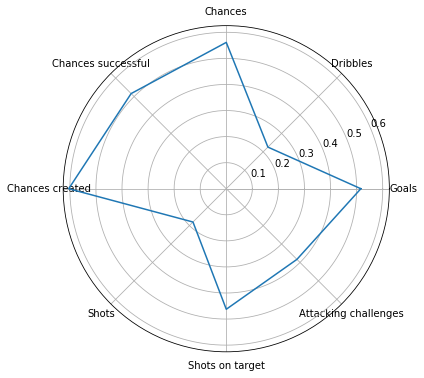

In [71]:
radar_chart ('Alexia Putellas')

In [117]:
radar_chart ('Angela Sosa Martin')

NameError: name 'radar_chart' is not defined

In [49]:
radar_chart ('Jenifer Hermoso')

NameError: name 'radar_chart' is not defined

In [137]:
posicion ('Ane Campos')

'Forward'

In [138]:
partidos_jugados ('Ane Campos')

11